
Basket option price in the Black Schole Model

Option price: 24.7160 

CI_Low=24.4338 , CI_Up=24.9982


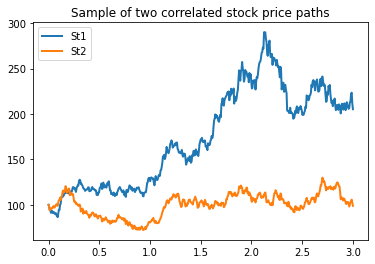

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt


# Parameter set
S0_ = 100
K_ = 100
T_ = 3
r_ = 0.05
sig1_= 0.3
sig2_ = 0.3
rho_ = 0.5
step_ = 500
MCrun_ = 10e4


S0         = np.float32(S0_)  # Initial stock price
K          = np.float32(K_)  # Strike price
T          = np.float32(T_)  # Option maturity in years
r          = np.float32(r_)  # Interest rate
sig1       = np.float32(sig1_) # Stock volatility
sig2       = np.float32(sig2_) # Stock volatility
rho        = np.float32(rho_) # Correlation coefficient
  
MCrun = np.int64(MCrun_) 
step = np.int64(step_)     

 # -------------------------------------------
 # Initialization 
 # ------------------------------------------- 
    
dt = np.float32( T / np.float32(step) )                                 

St1   = np.zeros((MCrun,step+1), dtype=np.float32)   # generate paths for stock 1
St2   = np.zeros((MCrun,step+1), dtype=np.float32)   # generate paths for stock 2
 
# initialize at time 0
 
St1[:,0]  = S0
St2[:,0]  = S0

 
# Generate random numbers
 
R1 = np.float32(np.random.randn(MCrun, step))
R2 = np.float32(np.random.randn(MCrun, step))

Zero = np.zeros((MCrun), dtype=np.float32)

for j in range(0,step):
        
       Rcor = rho*R1[:,j] + np.sqrt(1-rho**2)*R2[:,j]
       
       dW2 = np.sqrt(dt)*Rcor # correlated Brownian increments
       dW1 = np.sqrt(dt)*R1[:,j]
        
       
       St1[:,j+1] = St1[:,j]*np.exp((r-0.5*sig1**2)*dt+sig1*dW1)
       St2[:,j+1] = St2[:,j]*np.exp((r-0.5*sig2**2)*dt+sig2*dW2)
       

#Basket option price in the BS-model

ave = 0.5 * (St1[:,j+1] + St2[:,j+1])

#print(ave)

Payoff = np.fmax(ave - K, Zero)

#print(Payoff)
 
OP = np.mean(np.exp(-r*T)*Payoff) # option price
 
stdB = np.std(Payoff)
 
Low = (OP - 1.96*stdB/np.sqrt(MCrun))
Up  = (OP + 1.96*stdB/np.sqrt(MCrun))  
        
  
print('\n' "Basket option price in the Black Schole Model" '\n')


print('Option price: {:.4f}'.format(OP), '\n')


print("CI_Low={:.4f} , CI_Up={:.4f}".format(Low,Up))


t = np.linspace(0,3, num=step+1)
plt.plot(t, St1[1,:].T, linewidth=2, label="St1")
plt.plot(t, St2[1,:].T, linewidth=2, label="St2")
plt.legend(loc="upper left")   
plt.title('Sample of two correlated stock price paths')         
plt.show()   